In [2]:
import os, random, sys, cv2, tqdm
import numpy as np # On va prendre des images et les traduires en matrices 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy as sp
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [3]:
!git clone https://github.com/MachineLearnia/breast_cancer_public_data.git

Cloning into 'breast_cancer_public_data'...
Updating files:  14% (616/4204)
Updating files:  15% (631/4204)
Updating files:  16% (673/4204)
Updating files:  17% (715/4204)
Updating files:  18% (757/4204)
Updating files:  19% (799/4204)
Updating files:  20% (841/4204)
Updating files:  21% (883/4204)
Updating files:  22% (925/4204)
Updating files:  23% (967/4204)
Updating files:  24% (1009/4204)
Updating files:  25% (1051/4204)
Updating files:  26% (1094/4204)
Updating files:  27% (1136/4204)
Updating files:  28% (1178/4204)
Updating files:  29% (1220/4204)
Updating files:  30% (1262/4204)
Updating files:  30% (1282/4204)
Updating files:  31% (1304/4204)
Updating files:  32% (1346/4204)
Updating files:  33% (1388/4204)
Updating files:  34% (1430/4204)
Updating files:  35% (1472/4204)
Updating files:  36% (1514/4204)
Updating files:  37% (1556/4204)
Updating files:  38% (1598/4204)
Updating files:  39% (1640/4204)
Updating files:  40% (1682/4204)
Updating files:  41% (1724/4204)
Updating 

In [4]:
!dir

 Le volume dans le lecteur C n'a pas de nom.
 Le num�ro de s�rie du volume est 9E74-1E37

 R�pertoire de c:\Users\Karim\OneDrive\Desktop\Formation\Formation Python\Machine Learning\breast_cancer_public_data

12/11/2025  15:17    <DIR>          .
12/11/2025  15:12    <DIR>          ..
12/11/2025  15:07         1�486�027 analyse_imagerie.ipynb
12/11/2025  15:17    <DIR>          breast_cancer_public_data
12/11/2025  15:08    <DIR>          data
12/11/2025  13:34    <DIR>          data_2
12/11/2025  13:31                29 README.md
               2 fichier(s)        1�486�056 octets
               5 R�p(s)  320�386�785�280 octets libres


In [5]:
os.chdir("breast_cancer_public_data")

In [6]:
!dir

 Le volume dans le lecteur C n'a pas de nom.
 Le num�ro de s�rie du volume est 9E74-1E37

 R�pertoire de c:\Users\Karim\OneDrive\Desktop\Formation\Formation Python\Machine Learning\breast_cancer_public_data\breast_cancer_public_data

12/11/2025  15:17    <DIR>          .
12/11/2025  15:17    <DIR>          ..
12/11/2025  15:17    <DIR>          data
12/11/2025  15:17    <DIR>          data_2
12/11/2025  15:17                29 README.md
               1 fichier(s)               29 octets
               4 R�p(s)  320�386�600�960 octets libres


In [7]:
#os.chdir("data_2")

In [8]:
#!dir
# on a ici un dossier avec des images de cancer du sein, négatif 
# et on a un dossier avec des images de cancer du sein, positif

In [9]:
folder_path = "./data_2/"

In [10]:
# Train data preparation 
classes = ["Negative","cancer"] 
dataset = []
for class_label in classes:
    class_pth = os.path.join(folder_path, class_label)
    label_index = classes.index(class_label)
    for img_file in tqdm.tqdm(os.listdir(class_pth)):
        img_path = os.path.join(class_pth, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224,224))
        dataset.append([img, label_index])


100%|██████████| 410/410 [00:00<00:00, 649.67it/s]


In [12]:
len(dataset)
# On a 820 images dans le dataset 

820

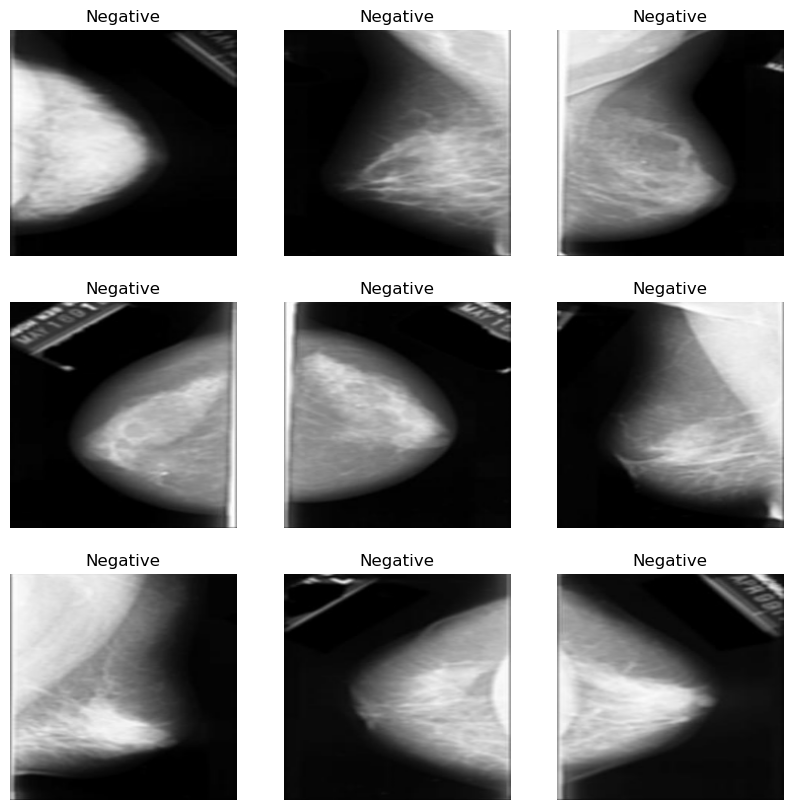

In [21]:
# afficher plusieurs images du dataset avec leurs labels
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(dataset[i][0])
    plt.title(classes[dataset[i][1]])
    plt.axis('off')

## Normalisation

In [ ]:
# Mettre toute les données sur une même echelle
# En gros, chaque pixel sur une image est une variable que l'on va ensuite dans notre réseaux de neurones. Il faut que variable soit sur la même échelle.

### Normalisation
X_images = []
y_images = []
for img, label in dataset:
    X_images.append(img)
    y_images.append(label)

x_images = np.array(X_images) / 255.0  
y_images = np.array(y_images)

## Decouper le dataset en jeu d'entraînement et de test 

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_images, y_images, test_size=0.2, random_state=42) # On prends 20% des images pour le test 

In [16]:
x_train.shape
x_test.shape

(164, 224, 224, 3)

## Entrainement du CNN

In [ ]:
model = Sequential()
model.add(Conv2D(100, (3, 3), activation='relu', input_shape=(224, 224, 3))) # 100 couches de convolution, taille 3x3 avec réactivation du réseaux de neurones.
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())  # Aplatir les données pour les passer dans des couches denses
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Pour éviter le surapprentissage (overfitting)
model.add(Dense(1, activation='sigmoid')) # Sortie binaire avec une coouche dense avec un seul neurone à l'intérieur (cancer ou pas), en gros probabilité qu'une image soit une tumeur ou non.


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 100)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 100)     90100     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 100)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 100)       90100     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 100)      

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

Interpretation du modèle:
- Le modèle fait des predictions sur les données d'entrainements (x_train)
- Il compare ces prédictions aux valeurs réelles (y_train) à l'aide d'une fonction de perte (binary_crossentropy)
- Cette fonction calcule un score d'erreur (le loss)
- l'optimiseur Adam permet d'ajuster les poids du modèle pour réduire l'erreur sur le prochain passage.

In [19]:
# Entraînement du modèle
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30


21/21 [==============================] - 54s 2s/step - loss: 0.5587 - accuracy: 0.7210 - val_loss: 0.4772 - val_accuracy: 0.7988
Epoch 2/30
21/21 [==============================] - 68s 3s/step - loss: 0.3130 - accuracy: 0.8979 - val_loss: 0.3478 - val_accuracy: 0.8780
Epoch 3/30
21/21 [==============================] - 139s 7s/step - loss: 0.2371 - accuracy: 0.9162 - val_loss: 0.3410 - val_accuracy: 0.8902
Epoch 4/30
21/21 [==============================] - 108s 5s/step - loss: 0.1790 - accuracy: 0.9284 - val_loss: 0.3622 - val_accuracy: 0.8598
Epoch 5/30
21/21 [==============================] - 116s 5s/step - loss: 0.1550 - accuracy: 0.9543 - val_loss: 0.3991 - val_accuracy: 0.8963
Epoch 6/30
21/21 [==============================] - 129s 6s/step - loss: 0.1661 - accuracy: 0.9482 - val_loss: 0.3228 - val_accuracy: 0.9268
Epoch 7/30
21/21 [==============================] - 587s 29s/step - loss: 0.1024 - accuracy: 0.9649 - val_loss: 0.3517 - val_accuracy: 0.8963
Epoch 8/30
2

Interpretation
- Le loss calculé sur les données d'entrainements indique l'erreur du modèle pendant l'apprentissage (il doit diminuer)
- L'accuracy calculé sur les données d'entrainements indique le pourcentage de bonnes prédictions (il doit augmenter)
- le val_loss calculé sur les données de validation indique l'erreur du modèle sur les données jamais vues  (il doit diminuer comme pour le loss)
- le val_accuracy calculé sur les données de validation indique le pourcentage de bonnes préducctions sur les données jamais vues  (doit augmenter et se rapprocher de l'accuracy sur données de train)

donc dans notre modèle, le val_loss augmente à la fin alors que le loss continue à baisser cela signifie que le modèle:
- apprend bien sur les données d'entrainements (il les mémorise)
- mais ne généralise pas correctement sur les données de validation qu'il n'a jamais vue ---> cas d'overfitting.

Stratification :
- Lorsqu'on découpe notre dataset en train /test, il faut que les deux aient à peu près la même proportion de cancers /non cancers.

In [ ]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_images, y_images, test_size=0.2, random_state=42, stratify=y_images)
# Stratify garde le même équilibre entre les classes

In [ ]:
# On va ici utiliser ImageDataGenerator pour augmenter artificiellement la taille de notre dataset en effectuant des transformations sur les images existantes (rotation, zoom, flip, etc.)
datagen = ImageDataGenerator(
    rotation_range=10, # rotation de 10 degrés
    width_shift_range=0.1, # décalage horizontal de 10%
    height_shift_range=0.1, # décalage vertical de 10%
    zoom_range=0.1, # zoom de 10%
    horizontal_flip=True, # retournement horizontal
)

datagen.fit(x_train_1)

# on réutilise pour entrainer notre modèle

history_augmented = model.fit(datagen.flow(x_train_1, y_train_1, batch_size=32),
                              epochs=30,
                              validation_data=(x_test_1, y_test_1))

Epoch 1/30
21/21 [==============================] - 126s 6s/step - loss: 1.0070 - accuracy: 0.7287 - val_loss: 0.3250 - val_accuracy: 0.8780
Epoch 2/30
21/21 [==============================] - 138s 7s/step - loss: 0.5370 - accuracy: 0.7637 - val_loss: 0.3471 - val_accuracy: 0.8780
Epoch 3/30
21/21 [==============================] - 115s 5s/step - loss: 0.4742 - accuracy: 0.7820 - val_loss: 0.3073 - val_accuracy: 0.8841
Epoch 4/30
21/21 [==============================] - 135s 6s/step - loss: 0.4443 - accuracy: 0.8110 - val_loss: 0.2269 - val_accuracy: 0.9451
Epoch 5/30
21/21 [==============================] - 107s 5s/step - loss: 0.4214 - accuracy: 0.8338 - val_loss: 0.2288 - val_accuracy: 0.9390
Epoch 6/30
21/21 [==============================] - 300s 15s/step - loss: 0.4185 - accuracy: 0.8079 - val_loss: 0.2688 - val_accuracy: 0.9390
Epoch 7/30
21/21 [==============================] - 94s 5s/step - loss: 0.3904 - accuracy: 0.8049 - val_loss: 0.1891 - val_accuracy: 0.9695
Epoch 8/30
21

## Indicateur de performance

- Le Recall (ou sensibilité) : Cette métrique évalue la capacité du modèle à trouver les vrais cancers 
- le AUC (Area Under the Curve): note globale de la qualité du modèle entre 0 et 1 (entre hasard et parfait s'il est proche de 1).

In [25]:
from sklearn.metrics import recall_score, roc_auc_score
y_pred_prob = model.predict(x_test_1)
y_pred = (y_pred_prob > 0.5).astype(int)
recall = recall_score(y_test_1, y_pred)
auc = roc_auc_score(y_test_1, y_pred_prob)
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")



6/6 [==============================] - 2s 264ms/step
Recall: 0.9390
AUC: 0.9917


En gros le modèle trouve environ 94% de vrais cancer dans mon jeu de test. Pour la performance on est environ à 99% ce qui signifie que le modèle distingue parfaitement les images "cancer" et "pas cancer".